In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
column_names = ['age', 'gender', 'height', 'weight', 'bmi', 'physical_activity_level', 'obesity_category']

In [3]:
dataset = pd.read_csv("obesity_data.csv", skiprows=1, names = column_names, sep = ",", skipinitialspace=True, low_memory=False)
dataset.head()

,age,gender,height,weight,bmi,physical_activity_level,obesity_category
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [5]:
print("#samples = ", dataset.shape[0])
print("#features = ", dataset.shape[1])

#samples =  1000
#features =  7


In [70]:
# checking the missing values
dataset[dataset.eq("?").any(axis=1)].head()

,age,gender,height,weight,bmi,physical_activity_level,obesity_category


there are no missing values

In [12]:
# manage metadata
def get_metadata(data):
    metadata = data.columns
    numerical_cols = data.select_dtypes(include = ["float64", "int64"]).columns.tolist()
    categorical_cols = data.select_dtypes(include = ["object"]).columns.tolist()
    print("Numerical features: ", numerical_cols)
    print("Categorical features: ", categorical_cols)
    return metadata, numerical_cols, categorical_cols

In [13]:
metadata, numeric_cols, categ_cols = get_metadata(dataset)

Numerical features:  ['age', 'height', 'weight', 'bmi', 'physical_activity_level']
Categorical features:  ['gender', 'obesity_category']


## Descriptive Statistical Analysis for Numerical Variables

Histogram with Frequencies

In [14]:
def hist_frequencies(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins)
    plt.xlabel(column)
    plt.ylabel("Frequencies")
    plt.title("Histogram distribution for " + column)
    plt.show()

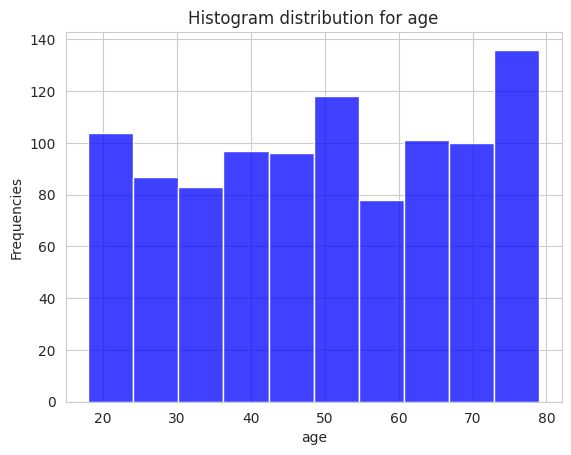

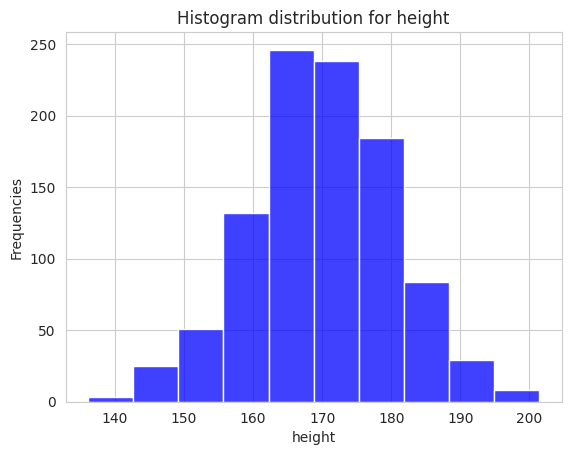

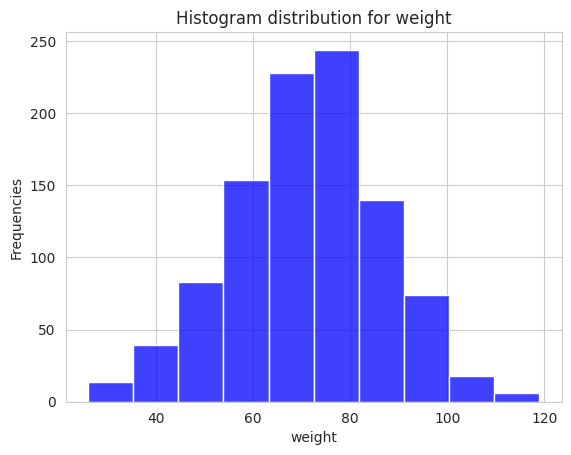

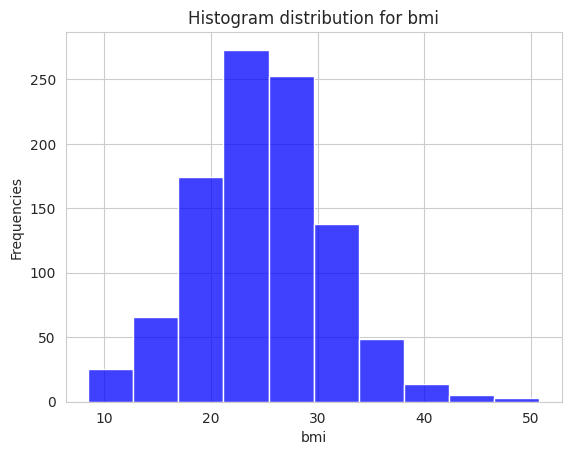

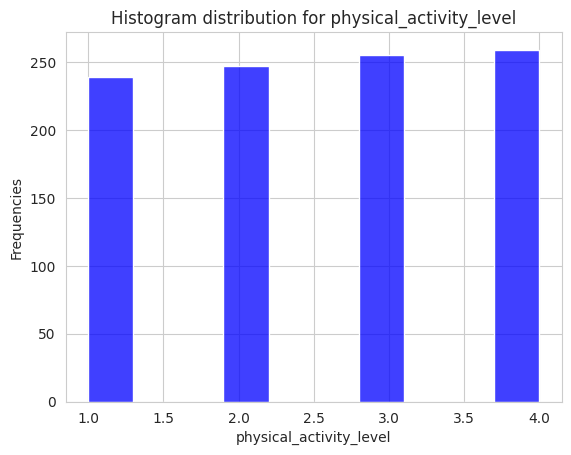

In [71]:
# plot the distribution for each numerical column
for col in numeric_cols:
    hist_frequencies(dataset, col, 10)

The histogram of frequencies visually represents the distribution of numerical variables in the dataset. Each bar in the histogram shows the count (frequency) of data points that fall within specific value ranges of the variable.
By observing the shape of the histogram, we can determine that data of height, weight and BMI nearly follows a normal distribution.

In [19]:
def hist_density(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins, kde = False, stat = "density", alpha = 0.5)
    sbn.kdeplot(data[column], color = "red", linewidth = 2)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.title("Histogram and KDE for " + column)
    plt.show()

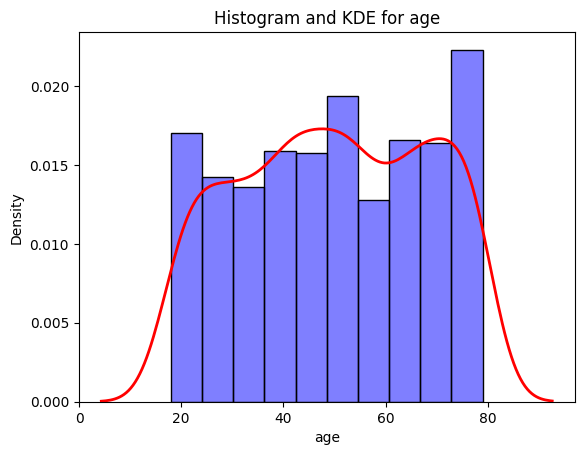

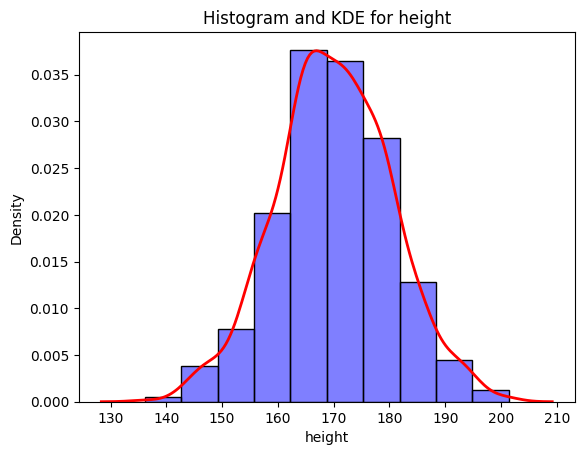

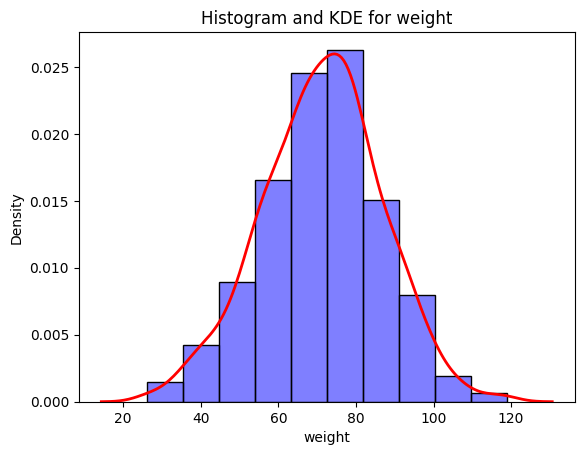

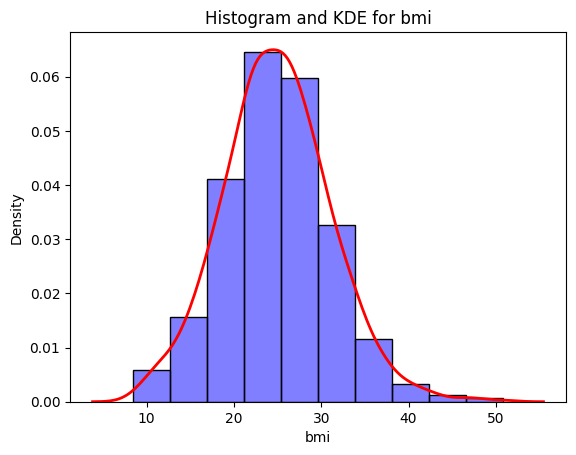

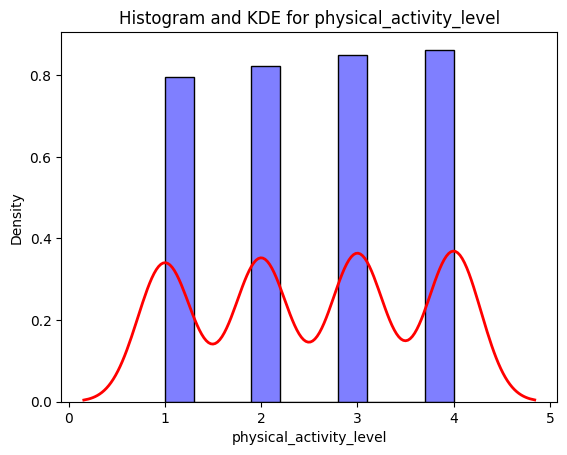

In [21]:
for col in numeric_cols:
    hist_density(dataset, col, 10)

Histogram with a smooth curve that represents the distribution of data points based on estimating the probability density function of a random variable.

In [22]:
def statistics_nvar(data, numerical_cols):
    # calculate the nrows and ncols for plots
    ncol_plots = 2
    nrow_plots = (len(numerical_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()
    # create boxplots for each numerical column
    for i, col in enumerate(numerical_cols):
        sbn.boxplot(data[col], ax = axs[i])
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

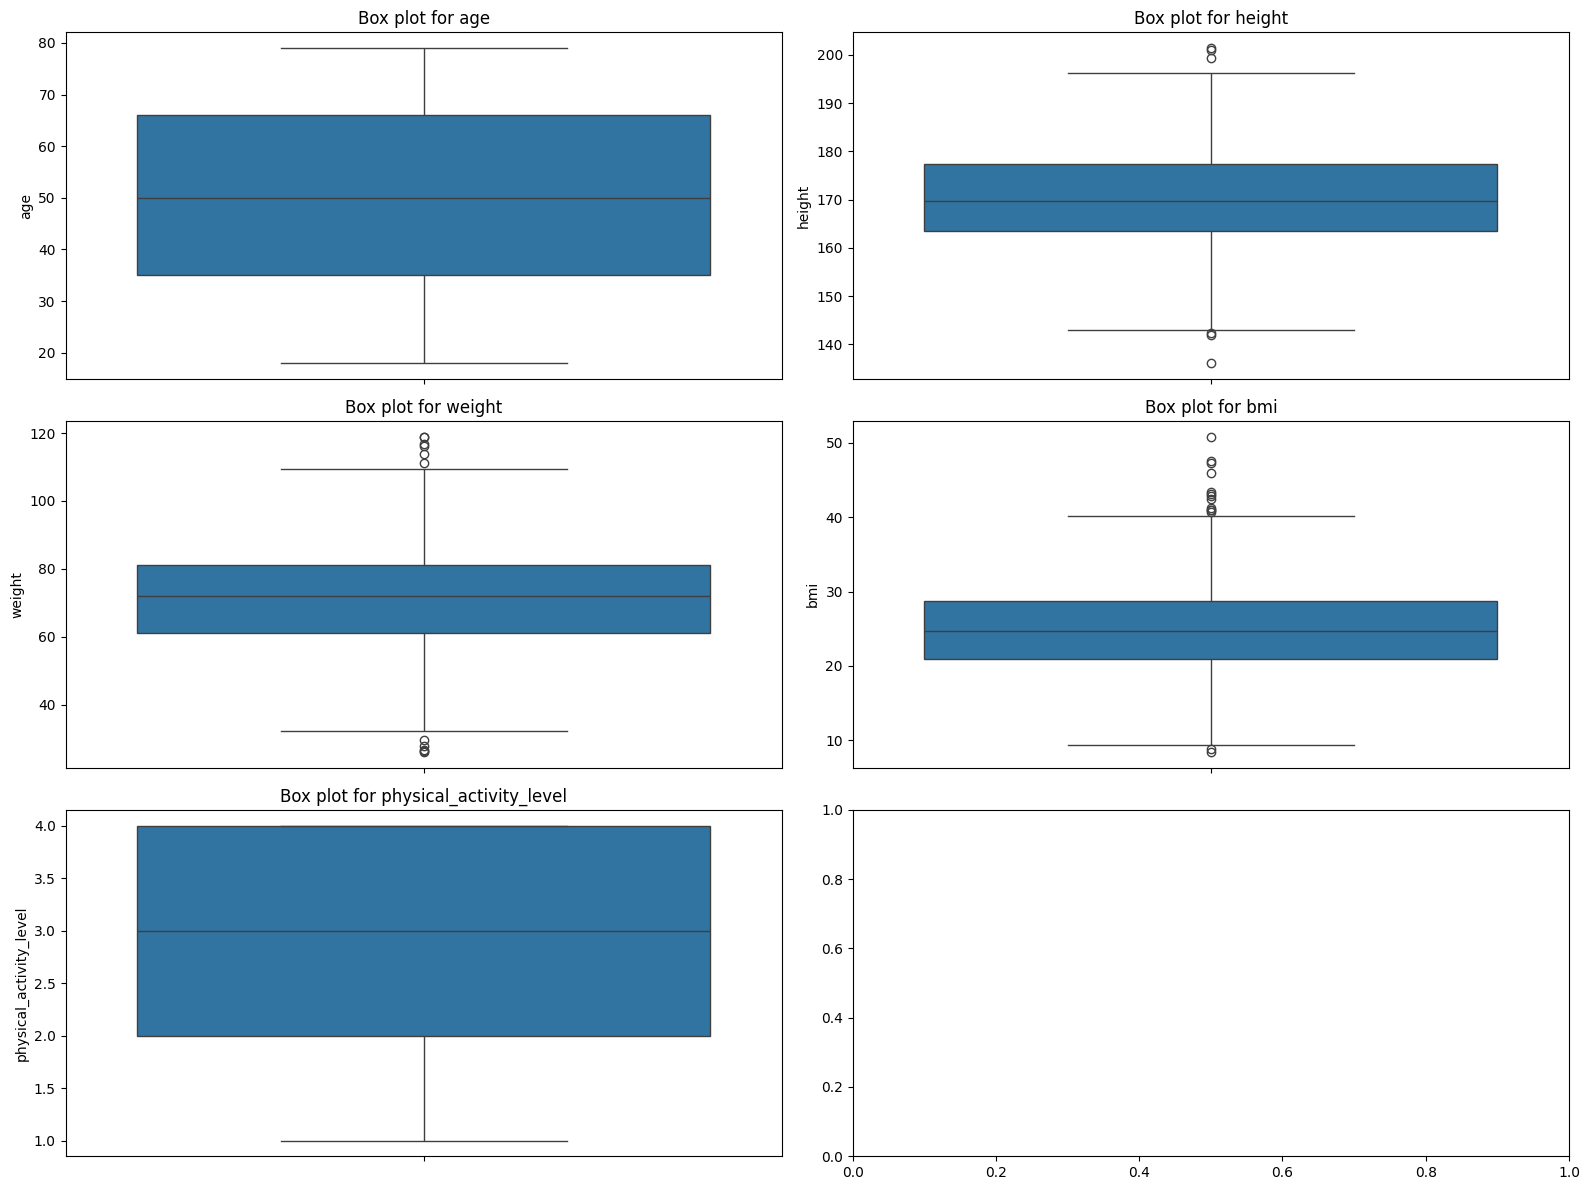

In [24]:
statistics_nvar(dataset, numeric_cols)

The box plot provides a visual summary of the distribution of a numerical variable through five key summary statistics: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. The "box" represents the interquartile range (IQR), which is the range between Q1 and Q3, where the middle 50% of the data lies. The line inside the box marks the median value. The "whiskers" extend from the box to the minimum and maximum values within 1.5 times the IQR. Any points outside this range are considered outliers and are shown as individual dots.

In [72]:
# statistical information about numerical variables
dataset[numeric_cols].describe()

,age,height,weight,bmi,physical_activity_level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


In [73]:
# function to plot correlation between numerical variables
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()
    plt.show()

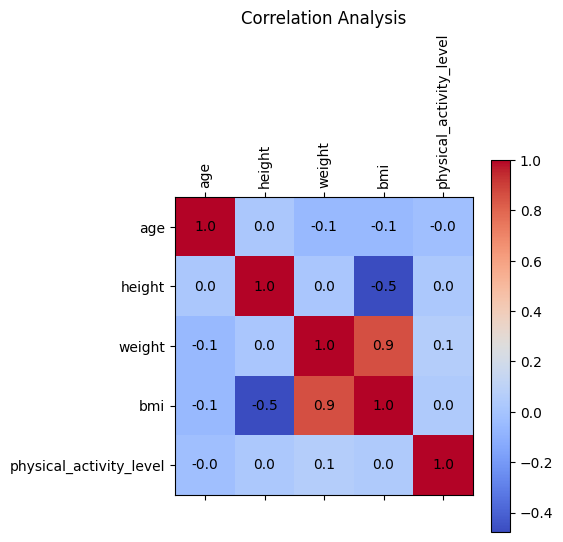

In [28]:
plot_correlation(dataset, numeric_cols)

The values inside each cell represent the Pearson correlation coefficient, ranging from -1 (strong negative correlation) to +1 (strong positive correlation), with 0 indicating no correlation.

In [74]:
from scipy import stats

# Function for outliers detection based on percentiles
def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)
    # Filter out the outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    return outliers

In [31]:
for col in numeric_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")



*** Outliers detection in age ***
#samples outlier to distribution = 18
%outliers = 1.8 %

*** Outliers detection in height ***
#samples outlier to distribution = 46
%outliers = 4.6 %

*** Outliers detection in weight ***
#samples outlier to distribution = 46
%outliers = 4.6 %

*** Outliers detection in bmi ***
#samples outlier to distribution = 46
%outliers = 4.6 %

*** Outliers detection in physical_activity_level ***
#samples outlier to distribution = 0
%outliers = 0.0 %


## Descriptive Statistical Analysis for Categorical Variables



In [32]:
for col in categ_cols:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** gender ******
gender
Male      523
Female    477
Name: count, dtype: int64

***** obesity_category ******
obesity_category
Normal weight    371
Overweight       295
Obese            191
Underweight      143
Name: count, dtype: int64


In [75]:
# function to plot bar chart for absolute frequencies in 1 categorical column
def plot_barchart(dataset, col):
    results = dataset[col].value_counts()
    plt.figure(figsize=(10, len(results) * 0.5))
    sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
    plt.title("Statistical analysis by " + col)
    plt.show()

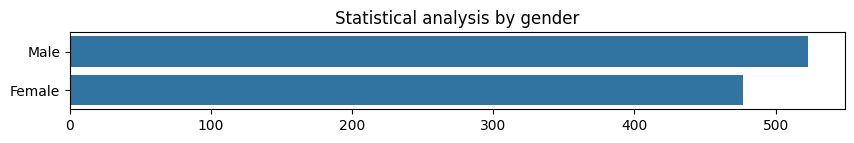

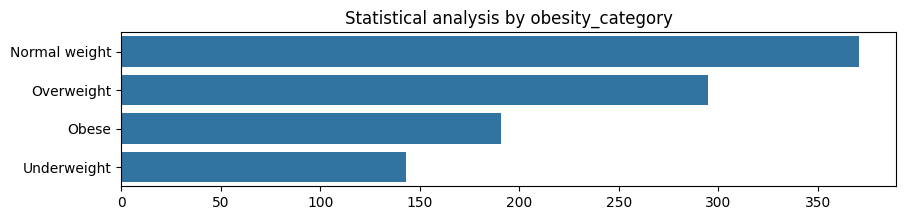

In [35]:
for col in categ_cols:
    plot_barchart(dataset, col)

The bar charts display the absolute frequencies of each category within categorical variables. This plot provides an easy way to compare the distribution of different categories, showing how many data points belong to each group.

In [76]:
# function to plot pie chart for relative frequencies in 1 categorical column
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

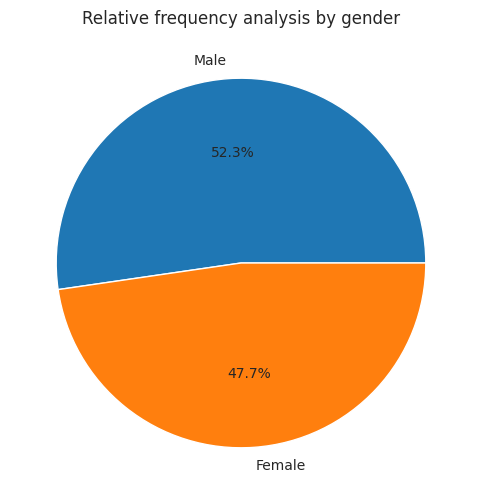

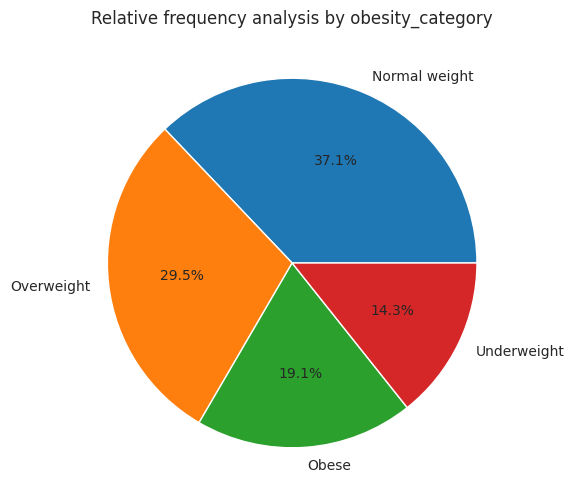

In [38]:
for col in categ_cols:
    plot_piechart(dataset, col)

The pie chart visualizes the relative frequencies (proportions) of each category within categorical variables.

## Descriptive Statistical Analysis for Groups of Categorical Variables

In [78]:
# create groups organized by gender and obesity category
group_gender_obesity = dataset.groupby(['gender', 'obesity_category']).size().reset_index(name='samples')

In [51]:
print(grouped_gender_obesity_cat)

obesity_category  Normal weight  Obese  Overweight  Underweight
gender                                                         
Female                      165     92         155           65
Male                        206     99         140           78


In [79]:
# function to plot absolute frequencies for groups
def plot_absfreq_groups(group, g1, g2):
    sbn.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "pastel")
    plt.xlabel('Gender')
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies by Gender and Obesity')
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

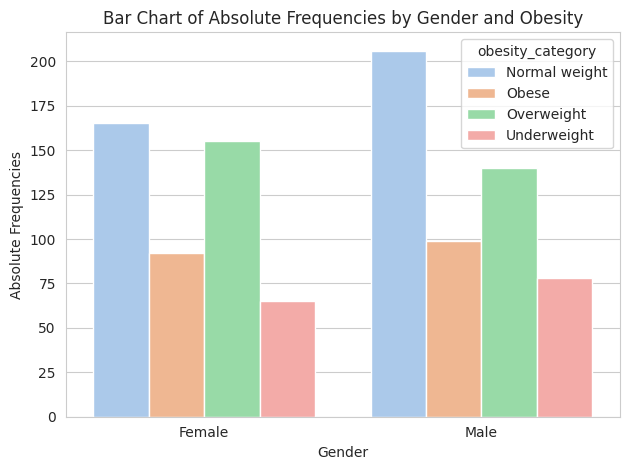

In [69]:
plot_absfreq_groups(group_gender_obesity, 'gender', 'obesity_category')

The grouped bar chart displays the absolute frequencies of instances based on the combination of two categorical variables: gender and obesity category. This plot helps to compare the distribution of obesity categories across genders, making it easy to identify patterns or differences in obesity rates between men and women.


In [55]:
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1] + ' ' + group[g2]
    sizes = group["samples"]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies by Gender and Obesity Category')
    plt.show()

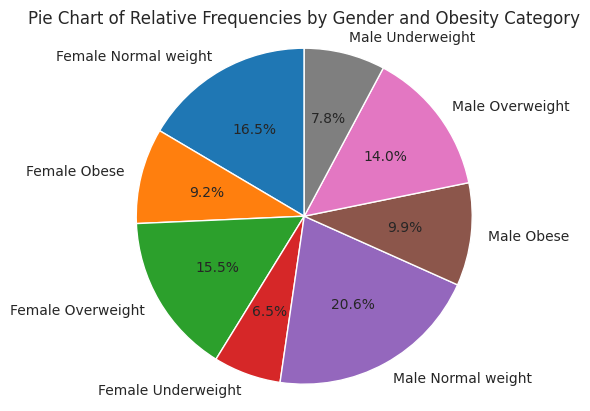

In [56]:
plot_relfreq_groups(group_gender_obesity, 'gender', 'obesity_category')

The grouped pie chart illustrates the relative frequencies (percentages) of different obesity categories within each gender group. This visualization helps to compare the distribution of obesity categories within each gender and provides insights into the proportional differences between them, highlighting how the obesity categories are distributed relatively within male and female groups.